In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('economic_index.csv')

In [4]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2010,1,5.0,8.2,1500
1,2010,2,5.1,8.1,1520
2,2010,3,5.2,8.0,1530
3,2010,4,5.0,7.9,1540
4,2010,5,5.3,7.8,1555


In [7]:
df.drop(columns=["year","month"],axis=1,inplace=True)

In [10]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [11]:
import seaborn as sns

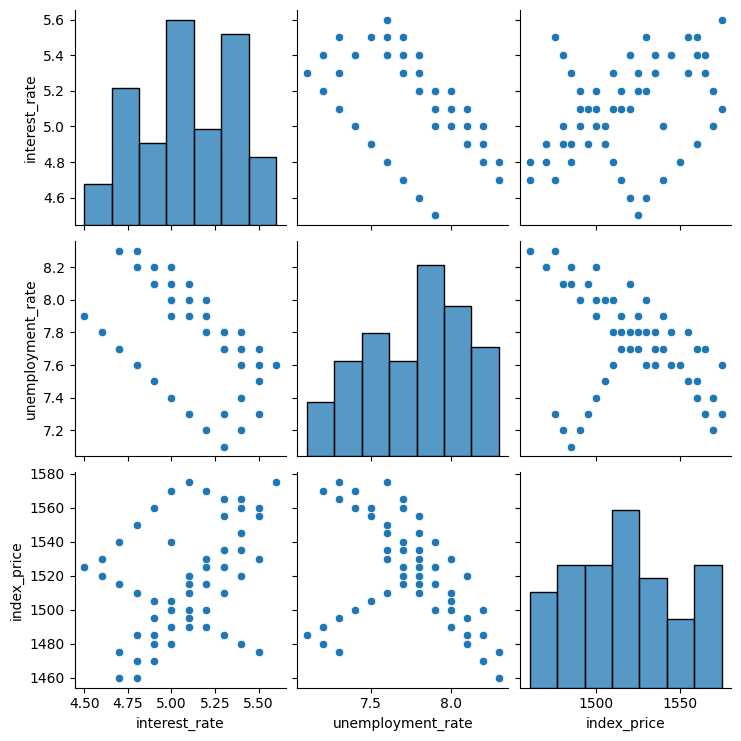

In [13]:
sns.pairplot(df)

In [15]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.475566,0.403664
unemployment_rate,-0.475566,1.000000,-0.496010
index_price,0.403664,-0.496010,1.000000


Text(0, 0.5, 'unemployment_rate')

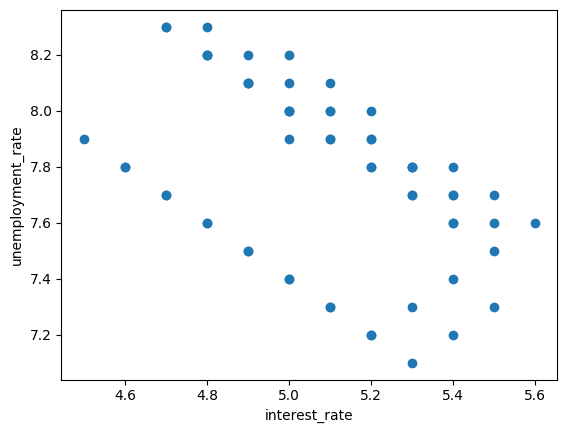

In [18]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [19]:
X = df[['interest_rate','unemployment_rate']]
y = df['index_price']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

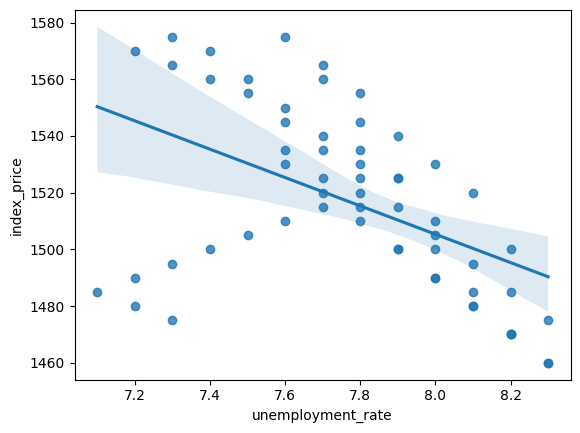

In [31]:
import seaborn as sns
sns.regplot(x='unemployment_rate', y='index_price', data=df)

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler();

In [33]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [39]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [45]:
validation_score

array([-1200.38781042,  -549.92804501,  -588.61778421,  -686.04365018,
        -908.54122694])

In [46]:
y_pred = regression.predict(X_test)

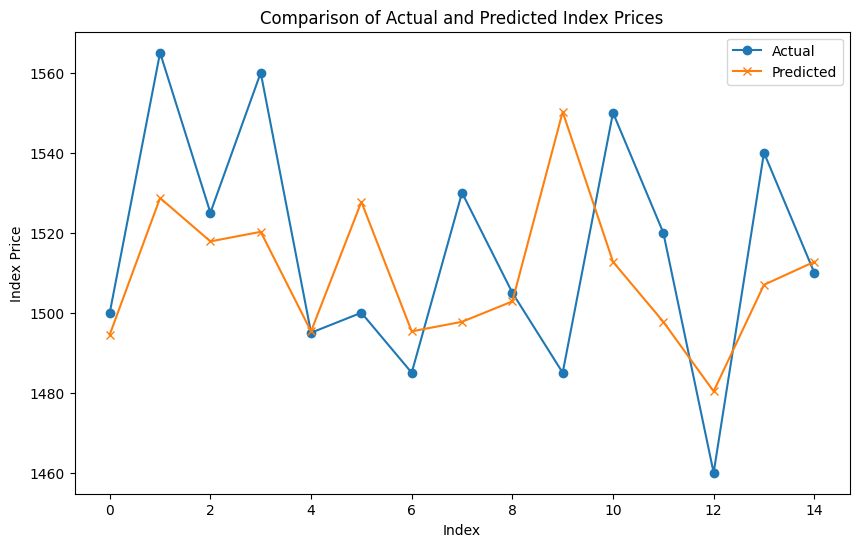

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Index Price')
plt.title('Comparison of Actual and Predicted Index Prices')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 836.890355590095
Mean Absolute Error: 22.82646667278112
R^2: -0.00239728510924353
Root Mean Squared Error: 28.92905728830608


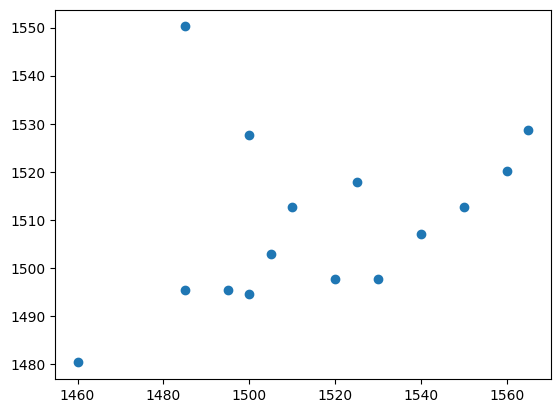

In [54]:
plt.scatter(y_test, y_pred)

In [56]:
residuals = y_test - y_pred
print(residuals)

0      5.459664
5     36.320916
36     7.168337
45    39.773609
13    -0.338578
54   -27.724086
33   -10.338578
48    32.266693
12     2.163727
57   -65.217170
46    37.271304
50    22.266693
31   -20.343189
3     33.015758
52    -2.728696
Name: index_price, dtype: float64


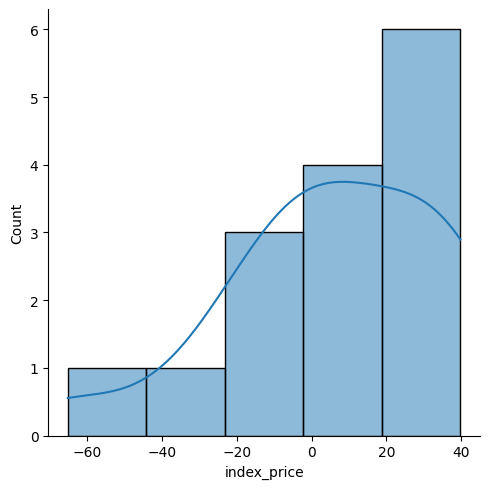

In [58]:
sns.displot(residuals, kde=True)

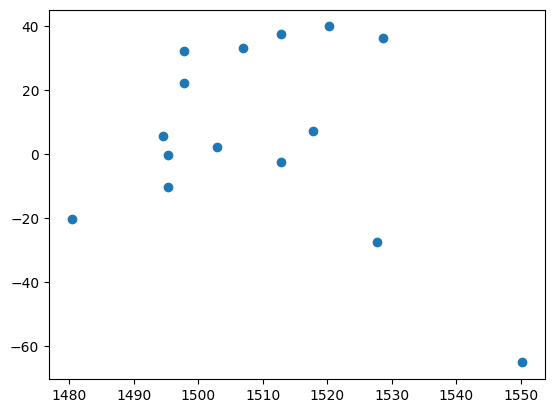

In [60]:
plt.scatter(y_pred,residuals)

In [62]:
%pip install statsmodels
import statsmodels.api as sm

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.8 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 3.6 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 3.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 3.7 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 3.7 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.8 MB 3.7 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 3.8 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 3.9 MB/s eta 0:00:01
   ----------------

In [63]:
 model = sm.OLS(y_train, X_train).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                           0.003400
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                       0.997
Time:                        12:35:21   Log-Likelihood:                         -393.47
No. Observations:                  45   AIC:                                      790.9
Df Residuals:                      43   BIC:                                      794.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.6860    273.724      0.032      0.975    -543.330     560.702
x2           -12.9751    273.724     -0.047      0.962    -564.991     539.041
==============================================================================
Omnibus:                        6.336   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.118
Skew:                          -0.751   Prob(JB):                       0.0774
Kurtosis:                       3.690   Cond. No.                         1.81
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
regression.coef_

array([  8.68603447, -12.97505012])